<a href="https://colab.research.google.com/github/SamuelSSan28/Curso_IA_GEDAI/blob/master/Processamento_de_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pré-Processamento  do Dataset


In [1]:
import pandas as pd

In [2]:
receitas = pd.read_csv('https://raw.githubusercontent.com/SamuelSSan28/Curso_IA_GEDAI/master/receitas.csv')
receitas.head()

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
0,30,Dificuldade baixa,5,16
1,45,Dificuldade baixa,9,11
2,45,Dificuldade baixa,11,21
3,15,Dificuldade baixa,9,11
4,10,Dificuldade baixa,5,21


In [3]:
receitas['dificuldade'].value_counts()

Dificuldade baixa      1760
Dificuldade média      1745
Dificuldade elevada      91
Name: dificuldade, dtype: int64

In [4]:
dificeis = receitas.loc[(receitas["quant_passos_preparo"] >= 30) | (receitas["quant_ingredientes"] >=  20) | (receitas["dificuldade"] == "Dificuldade elevada")]
dificeis['dificuldade']  = ["Dificuldade elevada"]* len(dificeis)
dificeis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
93,45,Dificuldade elevada,15,32
135,1440,Dificuldade elevada,5,33
198,45,Dificuldade elevada,8,31
231,90,Dificuldade elevada,13,30
246,150,Dificuldade elevada,14,36
...,...,...,...,...
3552,30,Dificuldade elevada,20,15
3554,150,Dificuldade elevada,21,17
3561,90,Dificuldade elevada,20,18
3578,45,Dificuldade elevada,21,16


In [5]:
medias = receitas.loc[(receitas["quant_passos_preparo"] < 25 ) & (receitas["quant_passos_preparo"] >= 15 )]
medias = medias.loc[(medias["quant_ingredientes"] >  10) &(medias["quant_ingredientes"] < 20) & (medias["dificuldade"] == "Dificuldade média")]
medias

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
1854,45,Dificuldade média,14,17
1855,480,Dificuldade média,12,16
1861,45,Dificuldade média,13,24
1863,45,Dificuldade média,11,19
1864,90,Dificuldade média,13,16
...,...,...,...,...
3586,150,Dificuldade média,19,18
3589,90,Dificuldade média,12,24
3590,1440,Dificuldade média,15,16
3591,45,Dificuldade média,13,16


In [6]:
faceis = receitas.loc[(receitas["quant_passos_preparo"] < 10 ) & (receitas["quant_ingredientes"] <  10) & (receitas["dificuldade"] == "Dificuldade baixa")]
faceis

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
15,15,Dificuldade baixa,7,9
16,15,Dificuldade baixa,6,9
56,30,Dificuldade baixa,7,7
106,30,Dificuldade baixa,9,9
144,90,Dificuldade baixa,4,8
...,...,...,...,...
1746,10,Dificuldade baixa,4,7
1749,30,Dificuldade baixa,6,8
1750,10,Dificuldade baixa,8,6
1751,30,Dificuldade baixa,9,9


## Machine Learning

In [7]:
receitas_concat = pd.concat([faceis, medias,dificeis])

In [8]:
receitas_concat.shape

(1035, 4)

In [9]:
receitas_concat['dificuldade'].value_counts()

Dificuldade média      534
Dificuldade baixa      287
Dificuldade elevada    214
Name: dificuldade, dtype: int64

In [10]:
receitas_concat.to_csv(r"receitas_passos_ingrediente.csv" ,index = False, header=True)

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

x = receitas_concat[['quant_ingredientes',	'quant_passos_preparo']]
y = receitas_concat['dificuldade']

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(776, 2)
(259, 2)
(776,)
(259,)


In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score
classificador = tree.DecisionTreeClassifier()

modelo_tree_receitas = classificador.fit(x_treino,y_treino)

In [13]:
predicao = modelo_tree_receitas.predict(x_teste)

In [14]:
# Avaliar a precisão com o teste
print(accuracy_score(y_teste, predicao)*100,"%")

96.13899613899613 %


In [15]:
predicao_treino = modelo_tree_receitas.predict(x_treino)

In [16]:
# Avaliar a precisão com o treinamento
print(accuracy_score(y_treino, predicao_treino)*100,"%")

96.1340206185567 %


## Classificando as outras Receitas


In [23]:
receitas_full = pd.read_csv('receitas_full.csv')
receitas_full.head()

,id,titulo,categoria,tempo_preparo,rendimento,ingredientes,modo_preparo,imagem
0,1,Receita de Bolo de laranja com casca e tudo,Receitas de Pão e bolos,45 Minutos,4 convidados,1 laranja inteira\n3 ovos\n175 gramas de farin...,Coloque na bancada todos os ingredientes neces...,https://t2.rg.ltmcdn.com/pt/images/9/5/2/bolo_...
1,2,Receita de Pão integral macio e úmido,Receitas de Pão e bolos,240 Minutos,8 convidados,Para o pré-fermento:\n½ copo americano de água...,Para conseguir um pão fofinho e crescido comec...,https://t1.rg.ltmcdn.com/pt/images/1/3/3/pao_i...
2,3,Receita de Pão caseiro de massa mole e fofinho,Receitas de Pão e bolos,150 Minutos,1 convidado,½ quilograma de farinha de trigo (500 g) \n1 c...,Comece por misturar a farinha e o sal numa tig...,https://t1.rg.ltmcdn.com/pt/images/7/3/3/pao_c...
3,4,Receita de Brownie vegano muito fácil,Receitas de Pão e bolos,45 Minutos,4 convidados,3 bananas maduras\n¼ xícara de farinha de avei...,Pré aqueça o forno em 180ºC e separe os ingred...,https://t2.rg.ltmcdn.com/pt/images/0/2/4/brown...
4,5,Receita de Bolo de milho econômico,Receitas de Pão e bolos,45 Minutos,10 convidados,1 lata de milho sem a água \n1 lata de água \n...,"Bata no liquidificador o milho, a água, o açúc...",https://t1.rg.ltmcdn.com/pt/images/3/7/4/bolo_...


In [33]:
dict_receitas = {'quant_ingredientes':[],	'quant_passos_preparo':[],'id':[]} 

receitas_full.dropna(axis=0,inplace=True)

cont = 0

for ingredientes,passos,id_receita in zip(receitas_full['ingredientes'],receitas_full['modo_preparo'],receitas_full['id']):
  
  ingredientes_n = len(ingredientes.split("\n"))
  try : 
    passos_n = len(passos.split("\n"))
  except:
    cont+=1

  dict_receitas['quant_ingredientes'].append(ingredientes_n)
  dict_receitas['quant_passos_preparo'].append(passos_n)
  dict_receitas['id'].append(id_receita)
  

0


In [36]:
receitas_full_ = pd.DataFrame(data=dict_receitas)
receitas_full_.head()

,quant_ingredientes,quant_passos_preparo,id
0,8,21,1
1,12,25,2
2,8,18,3
3,9,13,4
4,8,11,5


In [41]:
predicao_full = modelo_tree_receitas.predict(receitas_full_[['quant_ingredientes',	'quant_passos_preparo']])

predicao_full

array(['Dificuldade elevada', 'Dificuldade elevada',
       'Dificuldade elevada', ..., 'Dificuldade baixa',
       'Dificuldade baixa', 'Dificuldade baixa'], dtype=object)

In [42]:
receitas_full['dificuldade'] = predicao_full

In [43]:
receitas_full.head()

,id,titulo,categoria,tempo_preparo,rendimento,ingredientes,modo_preparo,imagem,dificuldade
0,1,Receita de Bolo de laranja com casca e tudo,Receitas de Pão e bolos,45 Minutos,4 convidados,1 laranja inteira\n3 ovos\n175 gramas de farin...,Coloque na bancada todos os ingredientes neces...,https://t2.rg.ltmcdn.com/pt/images/9/5/2/bolo_...,Dificuldade elevada
1,2,Receita de Pão integral macio e úmido,Receitas de Pão e bolos,240 Minutos,8 convidados,Para o pré-fermento:\n½ copo americano de água...,Para conseguir um pão fofinho e crescido comec...,https://t1.rg.ltmcdn.com/pt/images/1/3/3/pao_i...,Dificuldade elevada
2,3,Receita de Pão caseiro de massa mole e fofinho,Receitas de Pão e bolos,150 Minutos,1 convidado,½ quilograma de farinha de trigo (500 g) \n1 c...,Comece por misturar a farinha e o sal numa tig...,https://t1.rg.ltmcdn.com/pt/images/7/3/3/pao_c...,Dificuldade elevada
3,4,Receita de Brownie vegano muito fácil,Receitas de Pão e bolos,45 Minutos,4 convidados,3 bananas maduras\n¼ xícara de farinha de avei...,Pré aqueça o forno em 180ºC e separe os ingred...,https://t2.rg.ltmcdn.com/pt/images/0/2/4/brown...,Dificuldade elevada
4,5,Receita de Bolo de milho econômico,Receitas de Pão e bolos,45 Minutos,10 convidados,1 lata de milho sem a água \n1 lata de água \n...,"Bata no liquidificador o milho, a água, o açúc...",https://t1.rg.ltmcdn.com/pt/images/3/7/4/bolo_...,Dificuldade elevada


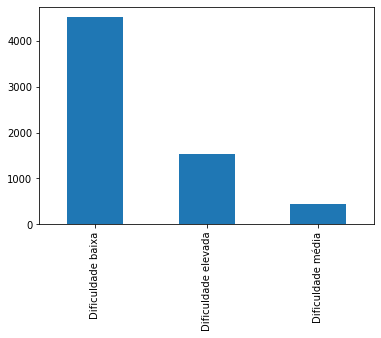

In [49]:
receitas_full["dificuldade"].value_counts().plot(kind="bar")

In [51]:
receitas_full_.to_csv(r"receitas_com_dificuldade.csv" ,index = False, header=True)

## Graficos


In [17]:
receitas = pd.read_csv('https://raw.githubusercontent.com/SamuelSSan28/Curso_IA_GEDAI/master/receitas.csv')
receitas.head()

,tempo_de_preparo,dificuldade,quant_ingredientes,quant_passos_preparo
0,30,Dificuldade baixa,5,16
1,45,Dificuldade baixa,9,11
2,45,Dificuldade baixa,11,21
3,15,Dificuldade baixa,9,11
4,10,Dificuldade baixa,5,21


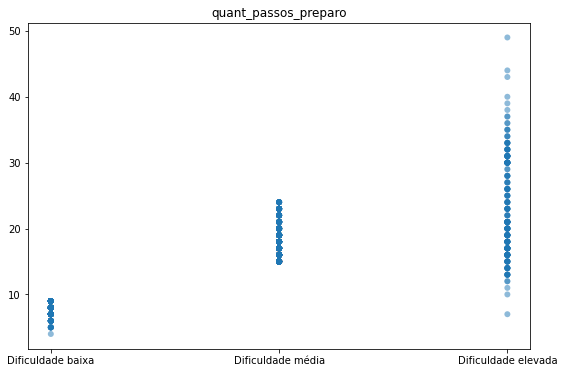

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6),)
plt.title("quant_passos_preparo")
ax.scatter(x=receitas_concat['dificuldade'],y= receitas_concat['quant_passos_preparo'],
               alpha=0.5, edgecolors='none')

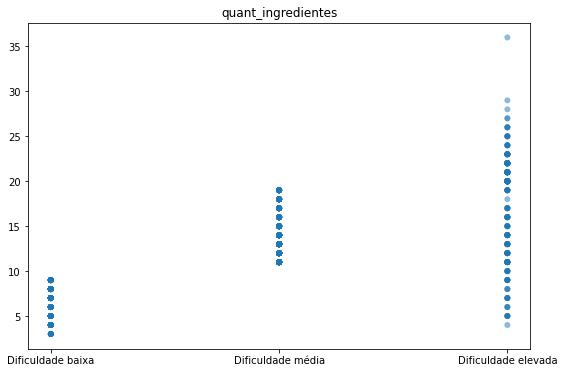

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6),)
plt.title("quant_ingredientes")
ax.scatter(x=receitas_concat['dificuldade'],y= receitas_concat['quant_ingredientes'],
               alpha=0.5, edgecolors='none')

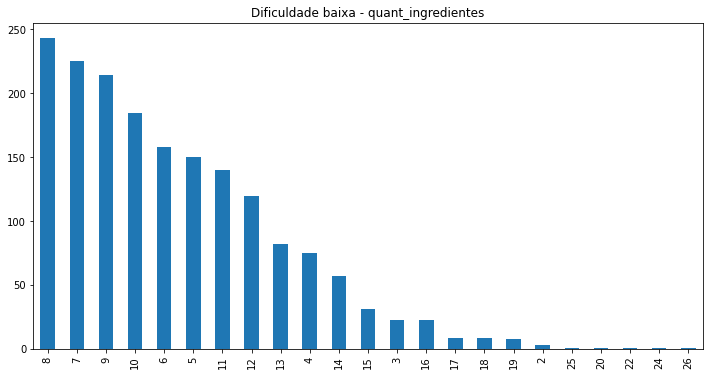

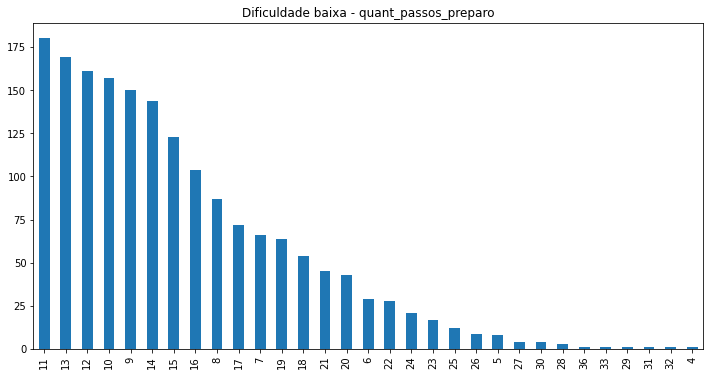

In [20]:
faceis = receitas.query("dificuldade == 'Dificuldade baixa'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade baixa - quant_ingredientes')
faceis.plot(kind="bar")

faceis = receitas.query("dificuldade == 'Dificuldade baixa'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade baixa - quant_passos_preparo')
faceis.plot(kind="bar")

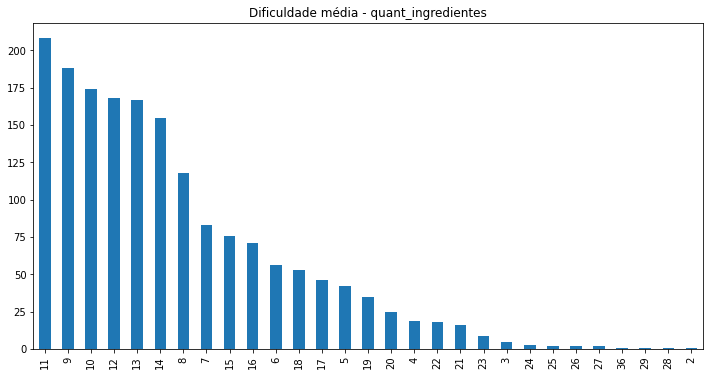

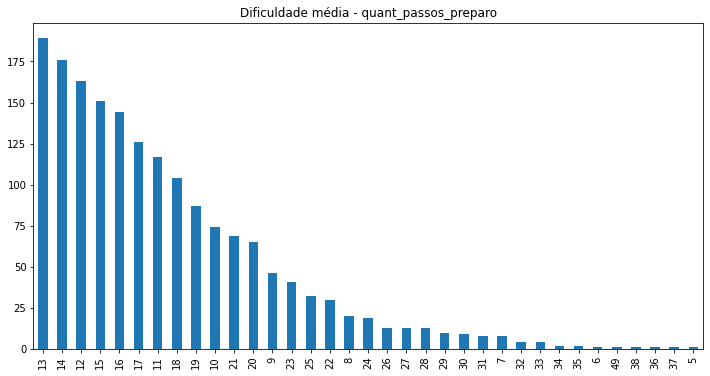

In [21]:
medias = receitas.query("dificuldade == 'Dificuldade média'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade média - quant_ingredientes')
medias.plot(kind="bar")

medias = receitas.query("dificuldade == 'Dificuldade média'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade média - quant_passos_preparo')
medias.plot(kind="bar")

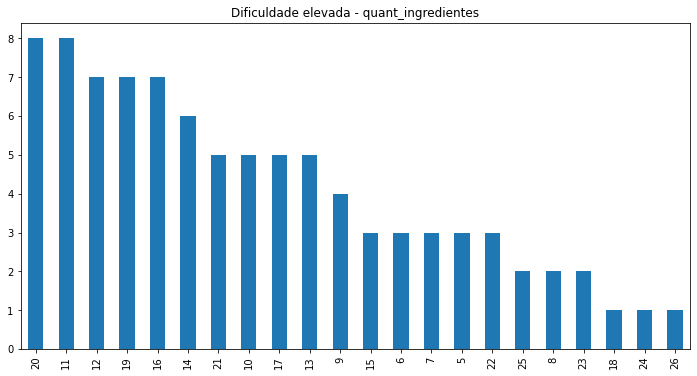

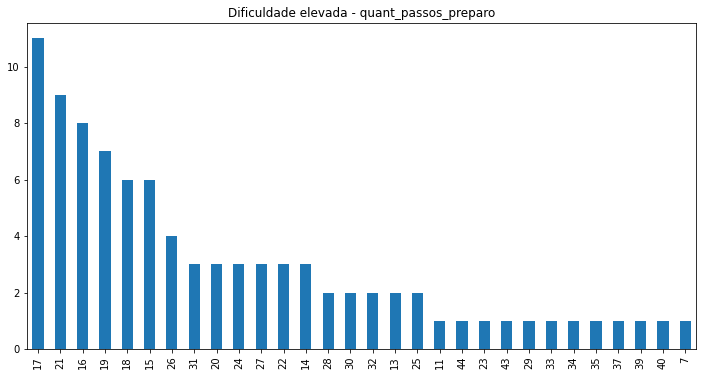

In [22]:
dificeis = receitas.query("dificuldade == 'Dificuldade elevada'")['quant_ingredientes'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade elevada - quant_ingredientes')
dificeis.plot(kind="bar")


dificeis = receitas.query("dificuldade == 'Dificuldade elevada'")['quant_passos_preparo'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Dificuldade elevada - quant_passos_preparo')
dificeis.plot(kind="bar")
